### Loading Datasets using Pandas

In [5]:
import pandas as pd

In [6]:
## You can give relative path or abosolute path
titanic_df = pd.read_csv( "./data/titanic.csv" )

In [7]:
#titanic_df = pd.read_csv( "C:\\dir1\\dir2\\data\\titanic.csv" ) ## Give full path

In [4]:
type( titanic_df )

pandas.core.frame.DataFrame

- DataFrame is like an in-memory sql table.
- Rows are indexed and column are named. Column names are taken from the first record in the data file.

In [4]:
## Print first 5 records
titanic_df.head(5)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [7]:
## Dimension of the dataframe
titanic_df.shape

(1313, 11)


In [6]:
### Detailed Metadata
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  1313 non-null   int64  
 1   pclass     1313 non-null   object 
 2   survived   1313 non-null   int64  
 3   name       1313 non-null   object 
 4   age        633 non-null    float64
 5   embarked   821 non-null    object 
 6   home.dest  754 non-null    object 
 7   room       77 non-null     object 
 8   ticket     69 non-null     object 
 9   boat       347 non-null    object 
 10  sex        1313 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB


## Indexing and Slicing

In [8]:
### First 3 records

titanic_df[0:3] # begin index : end index (until)

#titanic_df[:3]

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male


In [9]:
### Last 3 records

titanic_df[-3:]

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female
1312,1313,3rd,0,"Zimmerman, Leo",NaN,NaN,NaN,NaN,NaN,NaN,male


In [10]:
## first 3 records and column called "name"

titanic_df[0:3]['name']

0           Allen, Miss Elisabeth Walton
1            Allison, Miss Helen Loraine
2    Allison, Mr Hudson Joshua Creighton
Name: name, dtype: object

In [10]:
### first 3 records and two columns 'name' and 'age'

cols = ['name', 'age']
titanic_df[0:3][cols]

,name,age
0,"Allen, Miss Elisabeth Walton",29.0
1,"Allison, Miss Helen Loraine",2.0
2,"Allison, Mr Hudson Joshua Creighton",30.0


In [11]:
titanic_df[0:3][['name', 'age']] ## typically used

,name,age
0,"Allen, Miss Elisabeth Walton",29.0
1,"Allison, Miss Helen Loraine",2.0
2,"Allison, Mr Hudson Joshua Creighton",30.0


## Aggregations

### How may passengers survived?

In [13]:
## titanic_df['survived']
titanic_df.survived.value_counts() ### Occurances of each unique value in the column

0    864
1    449
Name: survived, dtype: int64

In [13]:
titanic_df.survived.value_counts( normalize = True ) * 100

0    65.803503
1    34.196497
Name: survived, dtype: float64

**Insight:** two out of every three passengers did not survive.

### Question 1:

How many male and females passengers were on board?

### What is proportion of male and female who survived vs not survived.

In [15]:
pd.crosstab( titanic_df.sex, 
             titanic_df.survived,
             margins = True )

survived,0,1,All
sex,,,
female,156,307,463
male,708,142,850
All,864,449,1313


In percentages:

1. Of all female what percentage survived and what perc did not survive? 
2. Of all those who survived, what percetage were male and what perc were female?

In [16]:
pd.crosstab( titanic_df.sex, 
             titanic_df.survived,
             normalize = "index" ) * 100

survived,0,1
sex,,
female,33.693305,66.306695
male,83.294118,16.705882


In [19]:
pd.crosstab( titanic_df.sex, 
             titanic_df.survived,
             normalize = "columns" ) * 100

survived,0,1
sex,,
female,18.055556,68.374165
male,81.944444,31.625835


### Question 2:

Was there any bias towards passanger class as far as survival is concerned?

In [20]:
titanic_df.pclass.value_counts(normalize=True)

3rd    0.541508
1st    0.245240
2nd    0.213252
Name: pclass, dtype: float64

In [23]:
pd.crosstab( titanic_df.pclass,
             titanic_df.survived,
             normalize = 'columns' )

survived,0,1
pclass,,
1st,0.149306,0.429844
2nd,0.186343,0.265033
3rd,0.664352,0.305122


Note: chi-square independence test.

### Passenger of what age or age group were mostly onboard the ship?

### Variable Types

Two variable types
- Numerical : quantify 
   - e.g. age, salary, sales
   - Two types
       - Continuous
       - Discrete : Specific values
           - e.g. Number of dependents
           - e.g. number of cars you own
- Categorical : 
    - e.g Sex/gender, survived vs. not survived, weekdays

### Histogram

For depicting the numerical variables (continuous)

In [17]:
import matplotlib.pyplot as plt

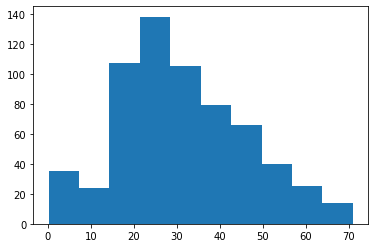

In [18]:
plt.hist( titanic_df.age.dropna() );

In [27]:
titanic_df.age.min()

0.1667

In [28]:
titanic_df.age.max()

71.0

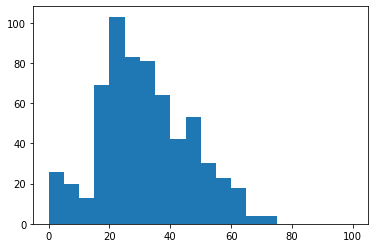

In [22]:
hist = plt.hist( titanic_df.age.dropna(), bins = 20, range =  (0,100) )

In [40]:
hist[0] # y axis value

array([ 26.,  20.,  13.,  69., 103.,  83.,  81.,  64.,  42.,  53.,  30.,
        23.,  18.,   4.,   4.,   0.,   0.,   0.,   0.,   0.])

In [39]:
hist[1] # x axis value

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

In [51]:
titanic_df.age.isnull().sum()

680

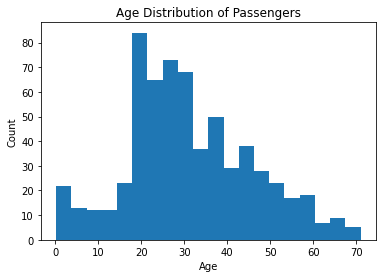

In [23]:
plt.hist( titanic_df.age.dropna(), bins = 20 );
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Passengers");
plt.savefig("age.png")

### Plotting Categorical Variable

How many survived?

In [25]:
import seaborn as sn

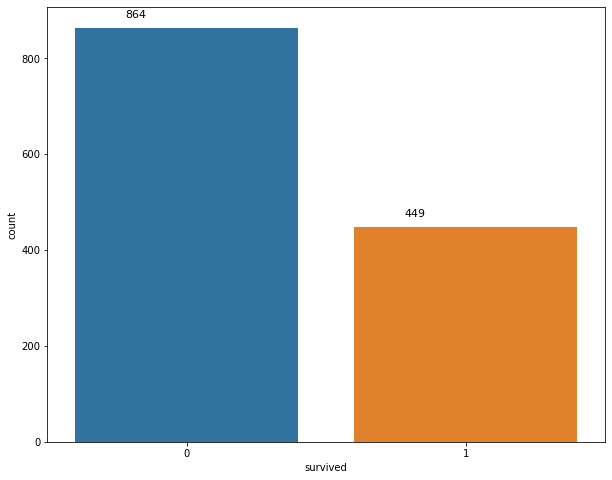

In [26]:
plt.figure( figsize = (10, 8) )
### Mostly used for categorical or discrete values
sn.countplot( data = titanic_df,
              x = 'survived' );

ax = plt.gca()

for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), 
                (p.get_x(), p.get_height()),
                fontsize=11, 
                color='black', 
                rotation=0, 
                xytext=(50, 10),
                textcoords='offset points')

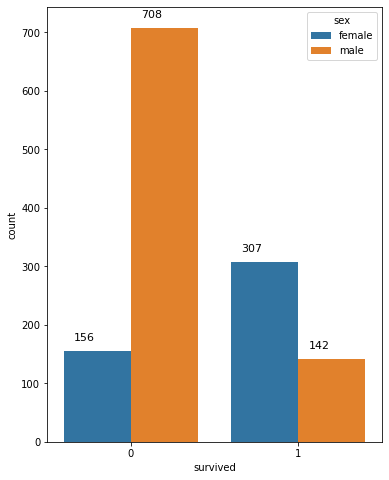

In [27]:
plt.figure( figsize = (6, 8) )

sn.countplot( data = titanic_df,
              x = 'survived',
              hue = 'sex' );

ax = plt.gca()

for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), 
                (p.get_x(), p.get_height()),
                fontsize=11, 
                color='black', 
                rotation=0, 
                xytext=(10, 10),
                textcoords='offset points')

In [ ]:
sn.countplot( data = titanic_df,
              hue = 'survived',
              x = 'sex' );
plt.savefig("survived.png")

### Question 3:

Plot (Count Plot) how many male and females were there in each passenger class?

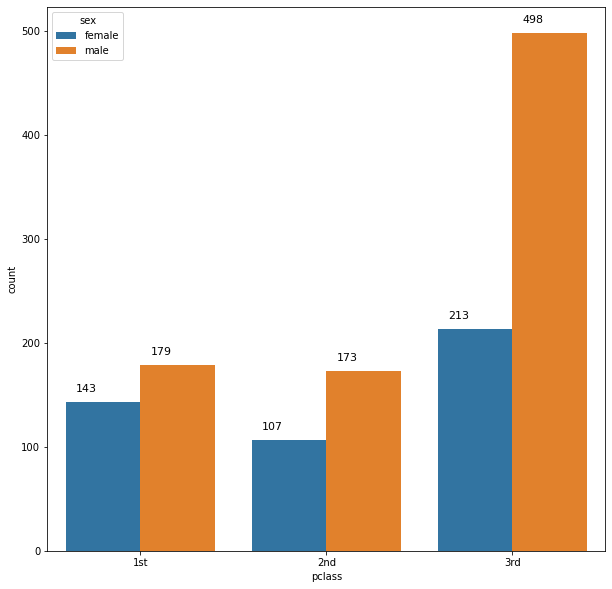

In [28]:
plt.figure( figsize = (10, 10) )

sn.countplot( data = titanic_df,
              x = 'pclass',
              hue = 'sex' );

ax = plt.gca()

for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), 
                (p.get_x(), p.get_height()),
                fontsize=11, 
                color='black', 
                rotation=0, 
                xytext=(10, 10),
                textcoords='offset points')

### Filtering 

#### How many children were on board and how many survived?

<= 5 years

In [29]:
children_df = titanic_df[titanic_df.age <= 5]

In [30]:
children_df.shape

(29, 11)

In [31]:
children_df.survived.value_counts()

1    24
0     5
Name: survived, dtype: int64

#### How many girl child who were less than 5 years old?

In [32]:
children_df = titanic_df[(titanic_df.age <= 5) & 
                         (titanic_df.sex == 'female')]

In [33]:
children_df.shape

(11, 11)

In [34]:
children_df.survived.value_counts()

1    9
0    2
Name: survived, dtype: int64

### Aggregations (GroupBy)

#### What is the average age of each passenger class?

In [43]:
age_df = titanic_df.groupby("pclass")['age'].mean()

In [44]:
age_df

pclass
1st    39.667773
2nd    28.300314
3rd    24.519658
Name: age, dtype: float64

In [45]:
type(age_df)

pandas.core.series.Series

In [46]:
### Converting into dataframes
age_df = age_df.reset_index()

In [47]:
type(age_df)

pandas.core.frame.DataFrame

In [48]:
age_df

,pclass,age
0,1st,39.667773
1,2nd,28.300314
2,3rd,24.519658


In [49]:
age_df.to_csv( "age.csv" )

In [50]:
### Writing without index
age_df.to_csv( "age_noindex.csv", index = False )